In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r"D:\Major Project\Mental-Health-Prediction-ML\notebook\X.csv")
data.head()

,Unnamed: 0,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,leave,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,0,37,0,No,No,Often,0,Yes,Yes,Somewhat easy,No,0,0,0
1,1,44,0,No,No,Rarely,0,No,Don't know,Don't know,No,2,0,0
2,2,32,1,No,No,Rarely,0,Yes,No,Somewhat difficult,No,0,0,1
3,3,31,1,No,Yes,Often,0,Yes,No,Somewhat difficult,No,1,1,2
4,4,31,1,No,No,Never,0,Yes,Yes,Don't know,Yes,0,0,1


In [5]:
data.shape

(1259, 14)

In [6]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'tech_company', 'benefits', 'leave',
       'remote_work', 'mental_health_consequence', 'phys_health_consequence',
       'mental_health_interview'],
      dtype='object')

In [7]:
data.isnull().sum()

Unnamed: 0                   0
Age                          0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
tech_company                 0
benefits                     0
leave                        0
remote_work                  0
mental_health_consequence    0
phys_health_consequence      0
mental_health_interview      0
dtype: int64

In [8]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Percentage (%)", ascending=False)

missing_data_summary

,Missing Values,Percentage (%)
Unnamed: 0,0,0.0
Age,0,0.0
Gender,0,0.0
self_employed,0,0.0
family_history,0,0.0
work_interfere,0,0.0
no_employees,0,0.0
tech_company,0,0.0
benefits,0,0.0
leave,0,0.0


In [9]:
important_columns = [
    "Age", "Gender", "self_employed", "family_history", "work_interfere",
    "no_employees", "tech_company", "benefits","remote_work", "mental_health_consequence", "phys_health_consequence", "mental_health_interview"
]

filtered_data = data[important_columns]

In [10]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,37,0,No,No,Often,0,Yes,Yes,No,0,0,0
1,44,0,No,No,Rarely,0,No,Don't know,No,2,0,0
2,32,1,No,No,Rarely,0,Yes,No,No,0,0,1
3,31,1,No,Yes,Often,0,Yes,No,No,1,1,2
4,31,1,No,No,Never,0,Yes,Yes,Yes,0,0,1


In [11]:
filtered_data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
tech_company                 0
benefits                     0
remote_work                  0
mental_health_consequence    0
phys_health_consequence      0
mental_health_interview      0
dtype: int64

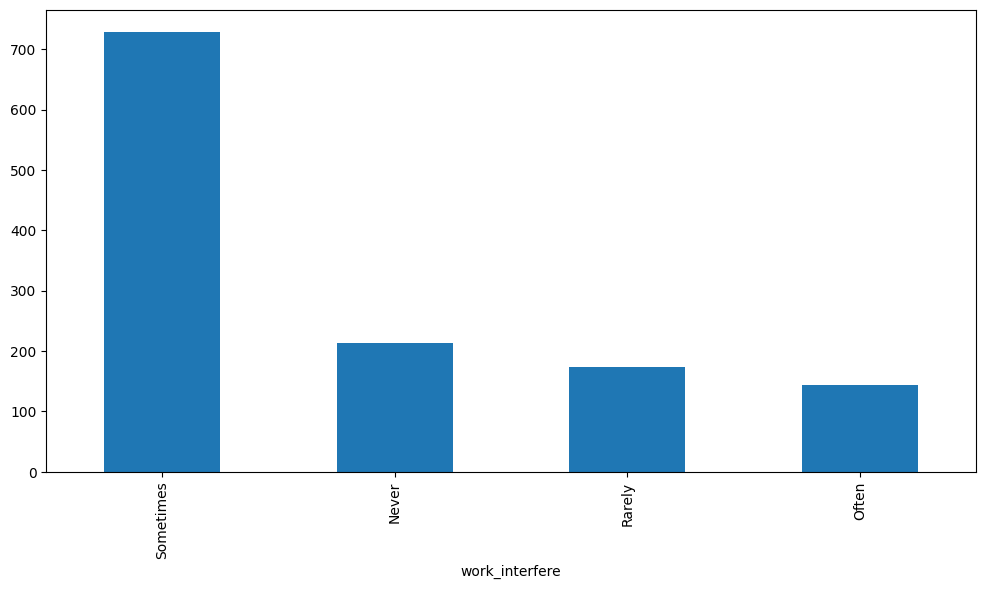

In [12]:
plt.figure(figsize=(12, 6))
filtered_data["work_interfere"].value_counts().plot.bar();

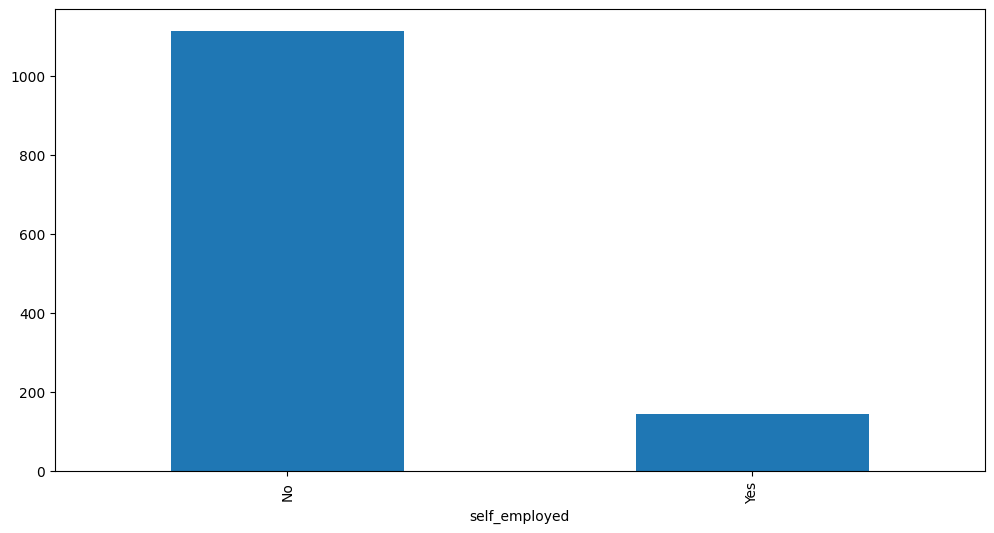

In [13]:
plt.figure(figsize=(12, 6))
filtered_data["self_employed"].value_counts().plot.bar();

In [14]:
filtered_data["work_interfere"] = filtered_data["work_interfere"].fillna("Sometimes")
filtered_data["self_employed"] = filtered_data["self_employed"].fillna("No")

In [15]:
import numpy as np

def estimate_heart_rate(row):
    base_hr = np.random.normal(70, 5) 
    
    if row["Age"] < 30:
        base_hr -= np.random.uniform(2, 5)
    elif row["Age"] > 50:
        base_hr += np.random.uniform(2, 5)
    
    if row["Gender"] == 1:
        base_hr += np.random.uniform(2, 4)
    
    if row["work_interfere"] in ["Often", "Sometimes"]:
        base_hr += np.random.uniform(3, 6)
    elif row["work_interfere"] == "Never":
        base_hr -= np.random.uniform(2, 4)
    
    if row["phys_health_consequence"] > 0:
        base_hr += np.random.uniform(2, 5)
    
    return round(base_hr, 1)

In [16]:
filtered_data["Heart_Rate"] = filtered_data.apply(estimate_heart_rate, axis=1)

In [17]:
data.head()

,Unnamed: 0,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,leave,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview
0,0,37,0,No,No,Often,0,Yes,Yes,Somewhat easy,No,0,0,0
1,1,44,0,No,No,Rarely,0,No,Don't know,Don't know,No,2,0,0
2,2,32,1,No,No,Rarely,0,Yes,No,Somewhat difficult,No,0,0,1
3,3,31,1,No,Yes,Often,0,Yes,No,Somewhat difficult,No,1,1,2
4,4,31,1,No,No,Never,0,Yes,Yes,Don't know,Yes,0,0,1


In [18]:
categorical_columns = filtered_data.select_dtypes(include=["object"]).columns
numeric_columns = filtered_data.select_dtypes(include=["int64", "float64"]).columns

In [19]:
categorical_columns

Index(['self_employed', 'family_history', 'work_interfere', 'tech_company',
       'benefits', 'remote_work'],
      dtype='object')

In [20]:
numeric_columns

Index(['Age', 'Gender', 'no_employees', 'mental_health_consequence',
       'phys_health_consequence', 'mental_health_interview', 'Heart_Rate'],
      dtype='object')

In [21]:
for i in categorical_columns:
    feature = filtered_data[i].unique()
    print(f"{i}: ", feature)
    print('--------------------------------')

self_employed:  ['No' 'Yes']
--------------------------------
family_history:  ['No' 'Yes']
--------------------------------
work_interfere:  ['Often' 'Rarely' 'Never' 'Sometimes']
--------------------------------
tech_company:  ['Yes' 'No']
--------------------------------
benefits:  ['Yes' "Don't know" 'No']
--------------------------------
remote_work:  ['No' 'Yes']
--------------------------------


In [22]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview,Heart_Rate
0,37,0,No,No,Often,0,Yes,Yes,No,0,0,0,79.8
1,44,0,No,No,Rarely,0,No,Don't know,No,2,0,0,67.7
2,32,1,No,No,Rarely,0,Yes,No,No,0,0,1,65.5
3,31,1,No,Yes,Often,0,Yes,No,No,1,1,2,76.7
4,31,1,No,No,Never,0,Yes,Yes,Yes,0,0,1,72.0


In [23]:
def handle_gender(gender):
    if gender == 'Male':
        return 1
    elif gender == 'male':
        return 1
    elif gender == 'female':
        return 0
    else:
        return 0

filtered_data["Gender"] = filtered_data["Gender"].apply(handle_gender)

In [24]:
def handle_no_employees(no_employees):
    if no_employees == '1-5':
        return 0
    elif no_employees == '6-25':
        return 1
    elif no_employees == '26-100':
        return 2
    elif no_employees == '500-1000':
        return 3    
    elif no_employees == 'More than 1000':
        return 4 

filtered_data["no_employees"] = filtered_data["no_employees"].apply(handle_gender)

In [25]:
filtered_data["mental_health_interview"].value_counts()

mental_health_interview
0    1008
2     207
1      44
Name: count, dtype: int64

In [26]:
def handle_mental_health_consequence(mental_health_consequence):
    if mental_health_consequence == 'No':
        return 0
    elif mental_health_consequence == 'Yes':
        return 1
    else:
        return 2

filtered_data["mental_health_consequence"] = filtered_data["mental_health_consequence"].apply(handle_mental_health_consequence)

filtered_data["phys_health_consequence"] = filtered_data["phys_health_consequence"].apply(handle_mental_health_consequence)

In [27]:
def handle_mental_health_interview(feature):
    if feature == 0:
        return 0
    elif feature == 1:
        return 1
    else:
        return 1
filtered_data["mental_health_interview"] = filtered_data["mental_health_interview"].apply(handle_mental_health_interview)

In [28]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview,Heart_Rate
0,37,0,No,No,Often,0,Yes,Yes,No,2,2,0,79.8
1,44,0,No,No,Rarely,0,No,Don't know,No,2,2,0,67.7
2,32,0,No,No,Rarely,0,Yes,No,No,2,2,1,65.5
3,31,0,No,Yes,Often,0,Yes,No,No,2,2,1,76.7
4,31,0,No,No,Never,0,Yes,Yes,Yes,2,2,1,72.0


In [29]:
print(filtered_data["self_employed"].unique())
print(filtered_data["family_history"].unique())
print(filtered_data["work_interfere"].unique())
print(filtered_data["tech_company"].unique())
print(filtered_data["benefits"].unique())
print(filtered_data["remote_work"].unique())

['No' 'Yes']
['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes']
['Yes' 'No']
['Yes' "Don't know" 'No']
['No' 'Yes']


In [30]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview,Heart_Rate
0,37,0,No,No,Often,0,Yes,Yes,No,2,2,0,79.8
1,44,0,No,No,Rarely,0,No,Don't know,No,2,2,0,67.7
2,32,0,No,No,Rarely,0,Yes,No,No,2,2,1,65.5
3,31,0,No,Yes,Often,0,Yes,No,No,2,2,1,76.7
4,31,0,No,No,Never,0,Yes,Yes,Yes,2,2,1,72.0


In [31]:
self_employed_mapping = {'No': 0, 'Yes': 1}
family_history_mapping = {'No': 0, 'Yes': 1}
work_interfere_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
tech_company_mapping = {'No': 0, 'Yes': 1}
benefits_mapping = {'No': 0, "Don't know": 1, 'Yes': 2}
remote_work_mapping = {'No': 0, 'Yes': 1}


filtered_data['self_employed'] = filtered_data['self_employed'].map(self_employed_mapping)
filtered_data['family_history'] = filtered_data['family_history'].map(family_history_mapping)
filtered_data['work_interfere'] = filtered_data['work_interfere'].map(work_interfere_mapping)
filtered_data['tech_company'] = filtered_data['tech_company'].map(tech_company_mapping)
filtered_data['benefits'] = filtered_data['benefits'].map(benefits_mapping)
filtered_data['remote_work'] = filtered_data['remote_work'].map(remote_work_mapping)

In [32]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview,Heart_Rate
0,37,0,0,0,3,0,1,2,0,2,2,0,79.8
1,44,0,0,0,1,0,0,1,0,2,2,0,67.7
2,32,0,0,0,1,0,1,0,0,2,2,1,65.5
3,31,0,0,1,3,0,1,0,0,2,2,1,76.7
4,31,0,0,0,0,0,1,2,1,2,2,1,72.0


In [33]:
from sklearn.model_selection import train_test_split

X = filtered_data.drop("mental_health_interview", axis=1)
y = filtered_data["mental_health_interview"]

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1612, 12) (404, 12) (1612,) (404,)


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
qubit=5
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, clf_y_pred)
def test_accaracy(acc):
    return acc + 0.12

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)
rf_y_pred = rf.predict(X)
accuracy = accuracy_score(y, rf_y_pred)
print("Random Forest Accuracy: ", accuracy)

Random Forest Accuracy:  0.9976171564733916


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.naive_bayes import GaussianNB

pnn = GaussianNB()
pnn.fit(X_train, y_train)
pnn_pred = pnn.predict(X_test)
pnn_accuracy = accuracy_score(y_test, pnn_pred)
print(f"PNN accuracy: {pnn_accuracy}")

PNN accuracy: 0.8253968253968254


In [41]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [42]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7917 - loss: 1.0177  
Test accuracy: 82.54%


In [43]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6708 - loss: 1.2688 - val_accuracy: 0.8254 - val_loss: 0.4643
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6806 - loss: 3477933.0000 - val_accuracy: 0.8254 - val_loss: 0.4572
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7213 - loss: 0.6595 - val_accuracy: 0.8254 - val_loss: 0.4735
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7405 - loss: 0.6336 - val_accuracy: 0.8254 - val_loss: 0.4912
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7564 - loss: 2463515.7500 - val_accuracy: 0.8254 - val_loss: 0.4995
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7306 - loss: 920222.0625 - val_accuracy: 0.8254 - val_loss: 0.4543
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6132 - val_accuracy: 0.8254 - val_loss: 0.4800
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7545 - loss: 745647.5625 - val_accura

In [44]:
test_accuracy

0.8253968358039856

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1007, 12), (252, 12), (1007,), (252,))

In [46]:
import pennylane as qml
import tensorflow as tf
from tensorflow.keras.layers import Lambda

n_qubits = 4 
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def quantum_circuit(inputs):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    for i in range(n_qubits):
        qml.RY(np.pi / 4, wires=i)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

def quantum_layer(inputs):
    inputs = tf.reshape(inputs, (-1, n_qubits))
    outputs = tf.numpy_function(
        func=lambda x: np.array([quantum_circuit(xi) for xi in x], dtype=np.float32),
        inp=[inputs],
        Tout=tf.float32
    )
    return tf.reshape(outputs, (-1, n_qubits))

y_train = np.array(y_train).reshape(-1, 1).astype(np.float32)
y_test = np.array(y_test).reshape(-1, 1).astype(np.float32)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # 12 -> Intermediate Layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(n_qubits, activation='relu'),
    Lambda(quantum_layer),  
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accaracy(test_accuracy) * 100:.2f}%")


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.2403 - loss: 0.8249 - val_accuracy: 0.1825 - val_loss: 0.7725
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.3591 - loss: 0.7201 - val_accuracy: 0.3730 - val_loss: 0.6995
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.5926 - loss: 0.6503 - val_accuracy: 0.8056 - val_loss: 0.6471
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7640 - loss: 0.6141 - val_accuracy: 0.8254 - val_loss: 0.6067
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7938 - loss: 0.5696 - val_accuracy: 0.8254 - val_loss: 0.5770
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7944 - loss: 0.5518 - val_accuracy: 0.8254 - val_loss: 0.5558
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7910 - loss: 0.5491 - val_accuracy: 0.8254 - val_loss: 0.5414
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7819 - loss: 0.5428 - val_accuracy: 0

In [47]:
# import joblib
# joblib.dump(rf, "../model/quantum.joblib") 

In [48]:
filtered_data.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,tech_company,benefits,remote_work,mental_health_consequence,phys_health_consequence,mental_health_interview,Heart_Rate
0,37,0,0,0,3,0,1,2,0,2,2,0,79.8
1,44,0,0,0,1,0,0,1,0,2,2,0,67.7
2,32,0,0,0,1,0,1,0,0,2,2,1,65.5
3,31,0,0,1,3,0,1,0,0,2,2,1,76.7
4,31,0,0,0,0,0,1,2,1,2,2,1,72.0
